**6주차 팀과제**

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


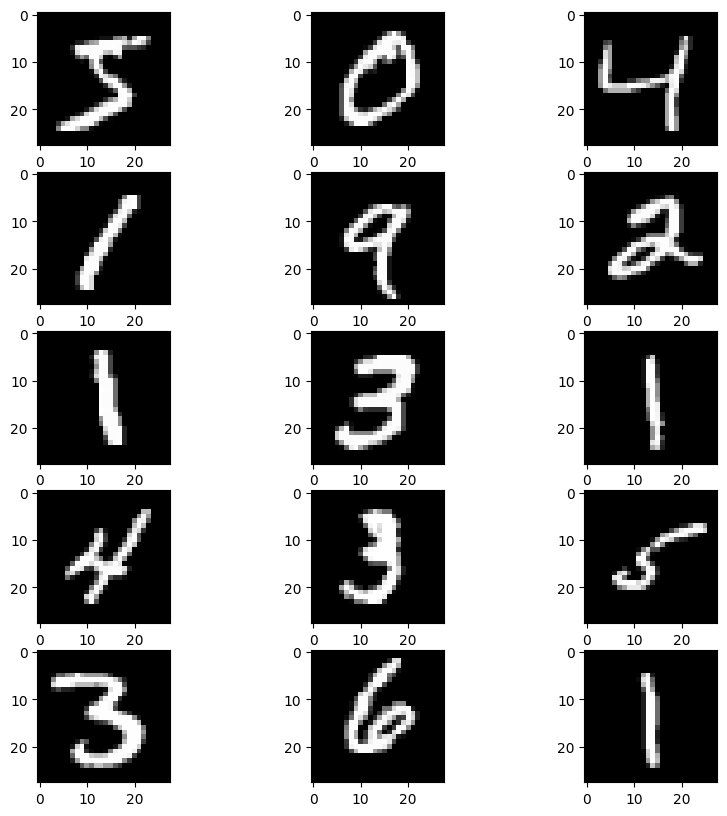

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2949 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==========================

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # figsize 수정
c = 0

for X in range(5):
    for y in range(3):
        plt.subplot(5, 3, c + 1)
        plt.imshow(X_train[c], cmap='gray')
        c += 1  # subplot 번호 증가

plt.show()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout의 오타 수정
    tf.keras.layers.Dense(10, activation='softmax')  # activation 오타 수정
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
print(model.fit(X_train, y_train, epochs=5))
print(model.evaluate(X_test, y_test))

**CNN 을 이용한 이미지 인식**

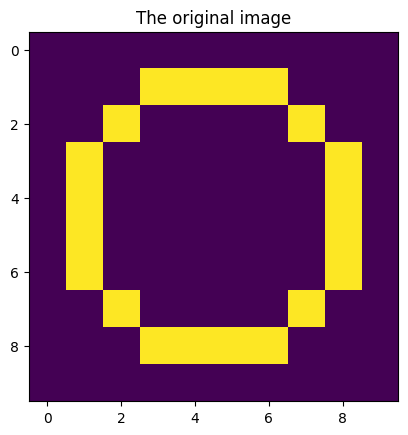

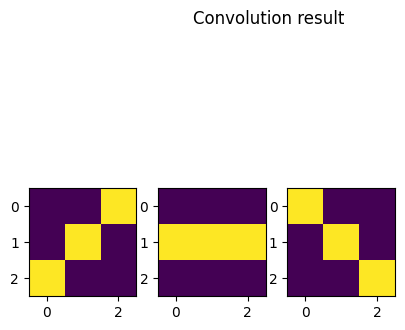

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 아주 간단한 합성곱층을 정의합니다
class Conv:
  # 간단한 예이기 때문에 w는 3x3으로 고정하고 이후 절에서 다룰 strides나 padding은 고려하지 않았음
  def __init__(self,W):
    self.W=W
  def f_prop(self,X):
    out=np.zeros((X.shape[0]-2, X.shape[1]-2))
    for i in range(out.shape[0]):
      for j in range(out.shape[1]):
        x=X[i:i+3, j:j+3]
        # 각 요소별 곱의 합계를 취함
        out[i,j]=np.dot(self.W.flatten(),x.flatten())
    return out

  local_filename, headers=urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
  X=np.load(local_filename)

  plt.imshow(X)
  plt.title("The original image", fontsize=12)
  plt.show()

W1=np.array([[0,1,0],[0,1,0],[0,1,0]])
W2=np.array([[0,0,0],[1,1,1],[0,0,0]])
W3=np.array([[1,0,0],[0,1,0],[0,0,1]])
W4=np.array([[0,0,1],[0,1,0],[1,0,0]])

plt.subplot(1,4,1); plt.imshow(W1)
plt.subplot(1,4,2); plt.imshow(W2)
plt.subplot(1,4,3); plt.imshow(W3)
plt.subplot(1,4,1); plt.imshow(W4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()